<a href="https://colab.research.google.com/github/sarahmagdi/ITI_NLP/blob/main/task1_preprocessing_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
import tensorflow_hub as hub
SEED = 1337
!pip install contractions



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import scattertext as st
import plotly.graph_objects as go
from plotly.offline import plot
#from imread import imread, imsave
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from IPython.display import IFrame
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.core.display import display, HTML
#from scattertext import CorpusFromPandas, produce_scattertext_explorer
from IPython.display import IFrame
from sklearn.svm import LinearSVC

import gc
import re
import string
import operator
from collections import defaultdict

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#import tokenization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
display(HTML("<style>.container { width:98% !important; }</style>"))

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
import tensorflow_hub as hub
SEED = 1337

In [66]:
from keras.datasets import imdb
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
from keras.utils.vis_utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [67]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Loading Dataset**

In [5]:
df_train = pd.read_csv("/content/dataset.csv",dtype={'id': np.int16, 'label': np.int8})

In [9]:
df_train.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


**EDA**

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int16 
 1   label   31962 non-null  int8  
 2   tweet   31962 non-null  object
dtypes: int16(1), int8(1), object(1)
memory usage: 343.5+ KB


In [16]:
#check NaNs
df_train.isnull().sum()


id       0
label    0
tweet    0
dtype: int64

In [18]:
#check duplicates
df_train.duplicated().sum()

0

In [20]:
#show samples of data texts to find out required preprocessing steps
df_train["tweet"]

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [21]:
#check dataset balancing
df_train.groupby("label").count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


In [37]:
df_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

**Cleaning and Preprocessing step**

1-handle unblanced df

In [40]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df_train[df_train.label==0]
df_minority = df_train[df_train.label==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=29720,    # to match majority class
                                 random_state=2242) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.label.value_counts()

0    29720
1    29720
Name: label, dtype: int64

In [42]:
len(df_upsampled)

59440

In [43]:
len(df_train)

31962

In [44]:
df_upsampled

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
28797,28798,1,@user white supremacy is not a joke (i agree) ...
14835,14836,1,when they call us #homophobic #misogynist ...
28990,28991,1,attack her chinguas~ &lt;33
27858,27859,1,@user @user nobdy wants 2 kiss #lying #conaist...


2-text preprocessing

In [45]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))



In [46]:
#Remove non-ASCII characters from list of tokenized words
def remove_non_ascii(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


In [47]:
def to_lowercase(text):
    return text.lower()


#Remove punctuation from list of tokenized words
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

#Replace all interger occurrences in list of tokenized words with textual representation
def replace_numbers(text):
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()

In [48]:
def remove_stopwords(words, stop_words):
    
    return [word for word in words if word not in stop_words]


In [49]:
def stem_words(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

In [50]:
def remove_contractions(sent):
    # creating an empty list
    expanded_words = []   
    for word in sent.split(" "):
        expanded_words.append(contractions.fix(word)) 

    return ' '.join(expanded_words)


def remove_links(text):
    template = re.compile(r'https?://\S+|www\.\S+') 
    text = template.sub(r'', text)
    return text


In [61]:
def normalize_text( text):
    text = remove_contractions(text)
    text = remove_links(text)
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [54]:
import contractions

In [63]:
import html
import unicodedata

In [68]:
#applaying prepro
df_upsampled['tweet'] = df_upsampled['tweet'].apply(lambda x: normalize_text(x))

In [69]:
df_upsampled['tweet'] 

0        user father dysfunctional selfish drag kid dys...
1        user user thank lyft credit use offer wheelcha...
2                                           bihday majesty
3                                     model love take time
4                            factsguide society motivation
                               ...                        
28797    user white supremacy joke agree lie wmn get la...
14835    call u homophobic misogynist really say jealou...
28990                                      attack chinguas
27858    user user nobdy want kiss lie conaist homophob...
3417       user might libtard libtard sjw liberal politics
Name: tweet, Length: 59440, dtype: object

In [70]:
df_upsampled

,id,label,tweet
0,1,0,user father dysfunctional selfish drag kid dys...
1,2,0,user user thank lyft credit use offer wheelcha...
2,3,0,bihday majesty
3,4,0,model love take time
4,5,0,factsguide society motivation
...,...,...,...
28797,28798,1,user white supremacy joke agree lie wmn get la...
14835,14836,1,call u homophobic misogynist really say jealou...
28990,28991,1,attack chinguas
27858,27859,1,user user nobdy want kiss lie conaist homophob...


In [91]:
X_train = df_upsampled['tweet'].values
y_train = df_upsampled["label"].values

In [92]:
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train= pad_sequences(X_train)

In [93]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=42)

In [94]:
X_train

array([[   0,    0,    0, ...,    1,    1,    1],
       [   0,    0,    0, ..., 1954, 1820, 1570],
       [   0,    0,    0, ...,   80,   40,  344],
       ...,
       [   0,    0,    0, ...,    0,  111,   66],
       [   0,    0,    0, ...,    5,  853,   31],
       [   0,    0,    0, ...,  474,  225,  363]], dtype=int32)

In [82]:
len(X_train)

47552

In [83]:
len(X_validation)

11888

In [87]:
X_validation

array([[   0,    0,    0, ...,  986,  526,    1],
       [   0,    0,    0, ...,   28,  201,    4],
       [   0,    0,    0, ..., 2539,   66,    1],
       ...,
       [   0,    0,    0, ...,  569,    1,  543],
       [   0,    0,    0, ...,  986, 2139, 2140],
       [   0,    0,    0, ..., 1838,  923,   99]], dtype=int32)

**LSTM model**

In [95]:
import tensorflow
embed_dim = 32
lstm_out = 32
model = models.Sequential()
model.add(layers.Embedding(max_features, embed_dim,input_length = X_train.shape[1]))
model.add(layers.Dropout(0.3))
model.add(layers.LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.4))
model.add(layers.Dense(1,activation='sigmoid'))
adam =tensorflow.keras.optimizers.Adam(learning_rate=0.002)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 18, 32)            96000     
                                                                 
 dropout_2 (Dropout)         (None, 18, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 104,353
Trainable params: 104,353
Non-trainable params: 0
_________________________________________________________________
None


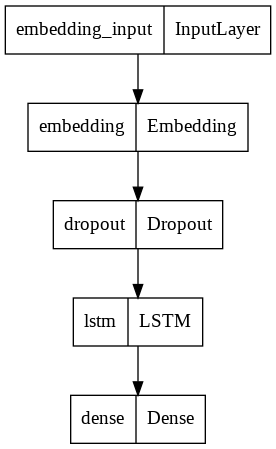

In [85]:
plot_model(model)

In [97]:
history = model.fit(X_train,
                    y_train,
                    epochs=7,
                    batch_size=2048,validation_data=(X_validation, y_validation))

Epoch 1/7
24/24 [==============================] - 7s 282ms/step - loss: 0.5892 - accuracy: 0.7079 - val_loss: 0.4038 - val_accuracy: 0.8551
Epoch 2/7
24/24 [==============================] - 4s 151ms/step - loss: 0.3057 - accuracy: 0.8835 - val_loss: 0.2165 - val_accuracy: 0.9155
Epoch 3/7
24/24 [==============================] - 4s 151ms/step - loss: 0.1912 - accuracy: 0.9266 - val_loss: 0.1602 - val_accuracy: 0.9401
Epoch 4/7
24/24 [==============================] - 4s 152ms/step - loss: 0.1489 - accuracy: 0.9452 - val_loss: 0.1338 - val_accuracy: 0.9528
Epoch 5/7
24/24 [==============================] - 4s 149ms/step - loss: 0.1244 - accuracy: 0.9568 - val_loss: 0.1194 - val_accuracy: 0.9574
Epoch 6/7
24/24 [==============================] - 4s 151ms/step - loss: 0.1093 - accuracy: 0.9618 - val_loss: 0.1103 - val_accuracy: 0.9622
Epoch 7/7
24/24 [==============================] - 4s 150ms/step - loss: 0.0996 - accuracy: 0.9655 - val_loss: 0.1048 - val_accuracy: 0.9656


In [98]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

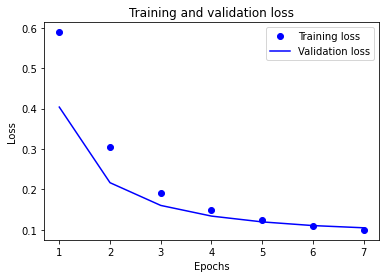

In [100]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [101]:
score = model.evaluate(X_validation, y_validation, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.10481224209070206
Test accuracy: 0.965595543384552
